# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | The seats were excellent, ..."
1,✅ Trip Verified | After the nightmare of get...
2,✅ Trip Verified | Prior to boarding a gate a...
3,✅ Trip Verified | I flew from Amsterdam to L...
4,"✅ Trip Verified | First the good news, the clu..."


In [ ]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Data Analysis:

In [ ]:
#We are doing 50 pages not 10

In [ ]:
#Get Count of how many reviews
df.count()

,0
reviews,3919


In [ ]:
#Check for Null inputs (if applicable)
print("Empty Rows:\n",df.isnull().sum())

Empty Rows:
 reviews    0
dtype: int64


In [ ]:
#Count of verified/unverified reviewws
import matplotlib.pyplot as plt

# Counting 'Trip Verified' and non-'Trip Verified' reviews
trip_verified_count = df[df['reviews'].str.contains('Trip Verified', case=False, na=False)].shape[0]
non_trip_verified_count = df[~df['reviews'].str.contains('Trip Verified', case=False, na=False)].shape[0]

print("Count of verified trips \n")
print(trip_verified_count)
print("\n")
print("Count of unverified trips \n")
print(non_trip_verified_count)

Count of verified trips 

1312


Count of unverified trips 

2607


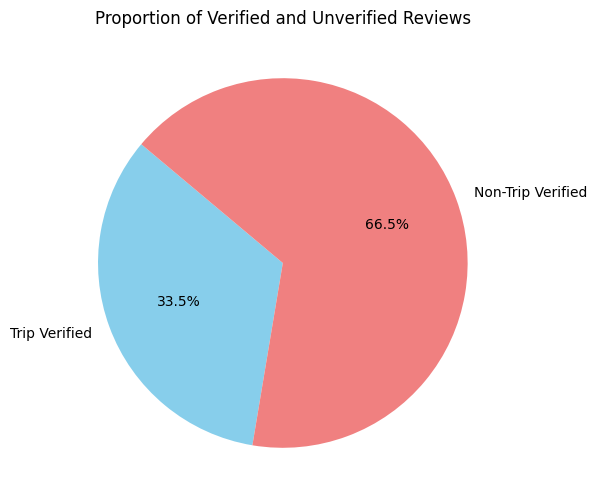

In [ ]:
# Creating data for the pie chart
categories = ['Trip Verified', 'Non-Trip Verified']
counts = [trip_verified_count, non_trip_verified_count]

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])

# Adding title
plt.title('Proportion of Verified and Unverified Reviews')

# Show the pie chart
plt.show()



**Bad Reviews:**

In [ ]:
#Creating a new dataframe with bad reviews

#Creating a dictionary of bad keywords which may be in the reviews
#Splitting said bad reviews in new dataframe
BadReviewsDict  = {
    "Delays": ["delayed", "late", "canceled", "rescheduled", "postponed", "missed", "grounded"],
    "Customer Service": ["rude", "unhelpful", "ignored", "unresponsive", "incompetent", "unprofessional"],
    "Baggage Issues": ["lost", "damaged", "stolen", "delayed", "mishandled", "broken"],
    "Comfort": ["uncomfortable", "cramped", "small seats", "legroom", "no recline", "tight space"],
    "Pricing & Fees": ["overpriced", "expensive", "hidden fees", "extra charges", "rip-off"],
    "Food & Beverages": ["bad food", "stale", "expired", "tasteless", "limited options"],
    "Cleanliness": ["dirty", "smelly", "filthy", "unsanitary", "messy"],
    "Flight Crew": ["rude", "unfriendly", "unprofessional", "negligent"],
    "Security & Safety": ["unsafe", "turbulence", "scary", "poor maintenance", "emergency landing"],
    "Entertainment & WiFi": ["broken screen", "no WiFi", "slow WiFi", "outdated movies"]
}


# Creating a dictionary where each category has its own filtered DataFrame
BadDf = {category: df[df["reviews"].str.contains('|'.join(words), case=False, na=False)] for category, words in BadReviewsDict.items()}

# Show the results
for category, sub_dfBd in BadDf.items():
    print(f"\nCategory: {category}")
    print(sub_dfBd)




Category: Delays
                                                reviews
3     ✅ Trip Verified |   I flew from Amsterdam to L...
6     ✅ Trip Verified | Terrible overall, medium ser...
9     Not Verified |  An hour's delay due to late ar...
10    ✅ Trip Verified |   I booked through BA becaus...
11    ✅ Trip Verified |   British airways lost bags ...
...                                                 ...
3890  I have just been reviewing all the reviews on ...
3891  Flew from San Francisco to Heathrow London. Fl...
3893  LGW-VRN-LGW both in Club Europe. Was offered a...
3899  Chicago O'Hare to London Heathrow on 2 May. ch...
3915  LHR to HAM. Purser addresses all club passenge...

[1233 rows x 1 columns]

Category: Customer Service
                                                reviews
2     ✅ Trip Verified |   Prior to boarding a gate a...
29    ✅ Trip Verified |   Disappointing service, pla...
33    ✅ Trip Verified |   I had visa issues, and hen...
58    Not Verified |  My wife and

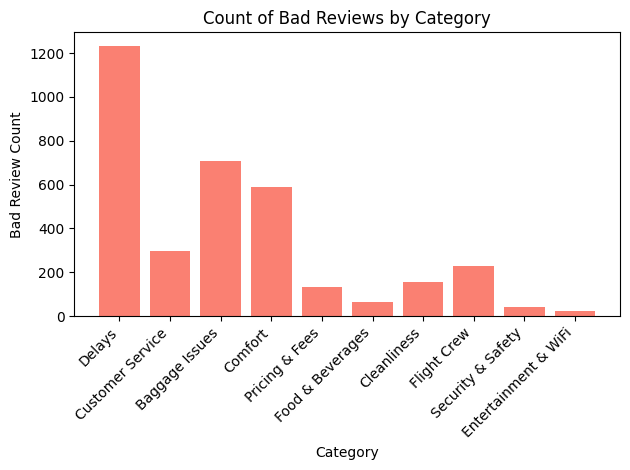

In [ ]:
#Average count
# Counting occurrences of each category based on keyword matches
BadDf = {category: df[df['reviews'].str.contains('|'.join(keywords), case=False, na=False)].shape[0]
                   for category, keywords in BadReviewsDict.items()}

# Extracting keys and values from the counts dictionary
categories = list(BadDf.keys())
counts = list(BadDf.values())

# Creating the bar chart
plt.bar(categories, counts, color='salmon')

# Adding title and labels
plt.title('Count of Bad Reviews by Category')
plt.xlabel('Category')
plt.ylabel('Bad Review Count')
plt.xticks(rotation=45, ha='right')

# Show the bar chart
plt.tight_layout()
plt.show()




**Good Reviews:**

In [ ]:
#Creating a new dataframe with good reviews

#Creating a dictionary of good keywords which may be in the reviews
#Splitting said good reviews in new dataframe
GoodReviewsDict = {
    "On-Time Performance": ["on time", "punctual", "early arrival", "smooth flight", "no delays"],
    "Customer Service": ["friendly", "helpful", "attentive", "courteous", "professional", "kind"],
    "Baggage Handling": ["fast baggage", "handled well", "no issues", "quick baggage claim"],
    "Comfort": ["spacious", "comfortable", "legroom", "reclining seats", "extra space"],
    "Pricing & Value": ["affordable", "great deal", "worth the price", "reasonable fare"],
    "Food & Beverages": ["delicious food", "fresh meal", "great selection", "tasty snacks"],
    "Cleanliness": ["clean", "spotless", "well-maintained", "sanitary", "fresh-smelling"],
    "Flight Crew": ["amazing crew", "great service", "accommodating", "attentive staff"],
    "Safety & Security": ["felt safe", "smooth takeoff", "smooth landing", "well-trained pilots"],
    "Entertainment & WiFi": ["great entertainment", "strong WiFi", "latest movies", "good selection"]
}

# Creating a dictionary where each category has its own filtered DataFrame
GoodDf = {
    category: df[df["reviews"].str.contains('|'.join(words), case=False, na=False)]
    for category, words in GoodReviewsDict.items()
}

# Show the results
for category, sub_df in GoodDf.items():
    if not sub_df.empty:  # Only print categories that have matching reviews
        print(f"\nCategory: {category}")
        print(sub_df)



Category: On-Time Performance
                                                reviews
7     ✅ Trip Verified |   London Heathrow to Male In...
21    ✅ Trip Verified | British Airways is absolute ...
26    ✅ Trip Verified |   Although like many these d...
31    ✅ Trip Verified |   I was surprised to receive...
34    ✅ Trip Verified |   Singapore to Heathrow with...
...                                                 ...
3882  LHR-FRA-LCY May 2014. LHR-FRA on a 767 row 18....
3884  2/5/2014 BRU-LHR-JFK. Short flight in business...
3898  JFK to LHR. Empty check in and priority securi...
3912  Flew return in CW from LHR to BKK in August 20...
3915  LHR to HAM. Purser addresses all club passenge...

[614 rows x 1 columns]

Category: Customer Service
                                                reviews
3     ✅ Trip Verified |   I flew from Amsterdam to L...
5     ✅ Trip Verified |   I have never travelled wit...
7     ✅ Trip Verified |   London Heathrow to Male In...
9     Not Verified | 

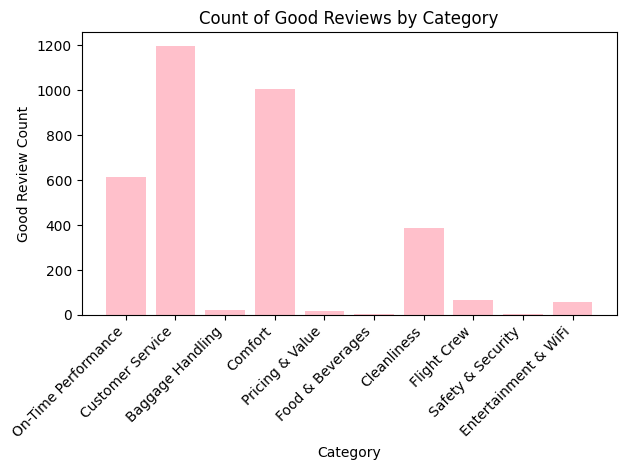

In [ ]:
# Counting occurrences of each category based on keyword matches
GoodDf = {category: df[df['reviews'].str.contains('|'.join(keywords), case=False, na=False)].shape[0]
                   for category, keywords in GoodReviewsDict.items()}

# Extracting keys and values from the counts dictionary
categories = list(GoodDf.keys())
counts = list(GoodDf.values())

# Creating the bar chart
plt.bar(categories, counts, color='Pink')

# Adding title and labels
plt.title('Count of Good Reviews by Category')
plt.xlabel('Category')
plt.ylabel('Good Review Count')
plt.xticks(rotation=45, ha='right')

# Show the bar chart
plt.tight_layout()
plt.show()


**Mixed Data:**

In [ ]:
#Destination discovery
DestinationDict = {
    "Africa": ["Accra", "Algiers", "Antananarivo", "Abuja", "Cairo", "Cape Town", "Dakar", "Entebbe",
               "Freetown", "Gaborone", "Harare", "Johannesburg", "Kampala", "Lagos", "Lusaka", "Mauritius",
               "Mombasa", "Nairobi", "Port Louis", "Sao Tome", "Tunis"],

    "Asia": ["Abu Dhabi", "Amman", "Bahrain", "Bangkok", "Beijing", "Chennai", "Colombo", "Delhi", "Doha",
             "Dubai", "Hyderabad", "Islamabad", "Jakarta", "Karachi", "Kathmandu", "Kuala Lumpur", "Lahore",
             "Manila", "Muscat", "Mumbai", "New Delhi", "Osaka", "Phuket", "Seoul", "Singapore", "Srinagar",
             "Tokyo", "Tehran", "Tel Aviv"],

    "Europe": ["Amsterdam", "Athens", "Barcelona", "Basel", "Berlin", "Belfast", "Belgrade", "Berlin Brandenburg",
               "Birmingham", "Bordeaux", "Brussels", "Budapest", "Copenhagen", "Dublin", "Dusseldorf", "Edinburgh",
               "Frankfurt", "Geneva", "Glasgow", "Hamburg", "Helsinki", "Innsbruck", "Istanbul", "Kiev", "Krakow",
               "Leeds", "Lisbon", "London", "Luxembourg", "Lyon", "Madrid", "Malaga", "Manchester", "Milan",
               "Munich", "Naples", "Nice", "Oslo", "Paris", "Prague", "Rome", "Salzburg", "Seville", "Stockholm",
               "Stuttgart", "Vienna", "Warsaw", "Zurich"],

    "North America": ["Atlanta", "Austin", "Baltimore", "Boston", "Calgary", "Chicago", "Dallas", "Denver",
                      "Fort Lauderdale", "Las Vegas", "Los Angeles", "Miami", "Montreal", "Nashville", "New York",
                      "Orlando", "Philadelphia", "Phoenix", "Pittsburgh", "San Francisco", "Toronto", "Vancouver",
                      "Washington"],

    "South America": ["Buenos Aires", "Rio de Janeiro", "Sao Paulo"],

    "Oceania": ["Auckland", "Brisbane", "Melbourne", "Perth", "Sydney"]
}

# Creating a dictionary where each category has its own filtered DataFrame
DestDf = {
    category: df[df["reviews"].str.contains('|'.join(words), case=False, na=False)]
    for category, words in DestinationDict.items()
}

# Show the results
for category, sub_df in DestDf.items():
    if not sub_df.empty:  # Only print categories that have matching reviews
        print(f"\nCategory: {category}")
        print(sub_df)


Category: Africa
                                                reviews
1     ✅ Trip Verified |   After the nightmare of get...
14    ✅ Trip Verified | I left for London from Johan...
29    ✅ Trip Verified |   Disappointing service, pla...
45    ✅ Trip Verified |   Appalling service with fai...
117   ✅ Trip Verified | I sat in the plane at Vienna...
...                                                 ...
3800  Flew LHR-CPT-LHR as British Airways is only ca...
3857  Heathrow - Johannesburg A380. My first flight ...
3860  Heathrow - Johannesburg. Concorde lounge comfo...
3866  Recently returned from Mauritius to Gatwick in...
3901  BA 059 London to Cape Town April 29 2014 econo...

[207 rows x 1 columns]

Category: Asia
                                                reviews
33    ✅ Trip Verified |   I had visa issues, and hen...
34    ✅ Trip Verified |   Singapore to Heathrow with...
40    Not Verified |  The flight scheduled at 1840 l...
53    ✅ Trip Verified |   British Airways Flig

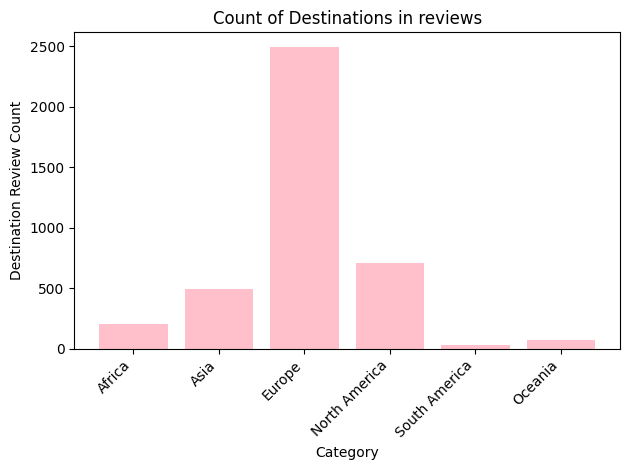

In [ ]:
# Counting occurrences of each category based on keyword matches
DestDf = {category: df[df['reviews'].str.contains('|'.join(keywords), case=False, na=False)].shape[0]
                   for category, keywords in DestinationDict.items()}

# Extracting keys and values from the counts dictionary
categories = list(DestDf.keys())
counts = list(DestDf.values())

# Creating the bar chart
plt.bar(categories, counts, color='Pink')

# Adding title and labels
plt.title('Count of Destinations in reviews')
plt.xlabel('Category')
plt.ylabel('Destination Review Count')
plt.xticks(rotation=45, ha='right')

# Show the bar chart
plt.tight_layout()
plt.show()

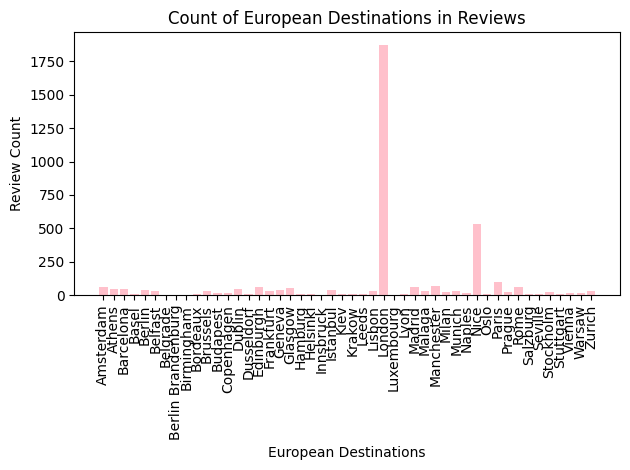

In [ ]:
# European destinations dictionary
EuropeDict = {
    "Europe": [
        "Amsterdam", "Athens", "Barcelona", "Basel", "Berlin", "Belfast", "Belgrade",
        "Berlin Brandenburg", "Birmingham", "Bordeaux", "Brussels", "Budapest", "Copenhagen",
        "Dublin", "Dusseldorf", "Edinburgh", "Frankfurt", "Geneva", "Glasgow", "Hamburg",
        "Helsinki", "Innsbruck", "Istanbul", "Kiev", "Krakow", "Leeds", "Lisbon", "London",
        "Luxembourg", "Lyon", "Madrid", "Malaga", "Manchester", "Milan", "Munich", "Naples",
        "Nice", "Oslo", "Paris", "Prague", "Rome", "Salzburg", "Seville", "Stockholm",
        "Stuttgart", "Vienna", "Warsaw", "Zurich"
    ]
}

# Create a dictionary to store the counts for each individual destination
DestDf = {}

# Loop through each destination and count the occurrences in the reviews column
for destination in EuropeDict["Europe"]:
    count = df[df['reviews'].str.contains(destination, case=False, na=False)].shape[0]
    DestDf[destination] = count

# Extracting the keys (destination names) and values (counts) from the DestDf dictionary
categories = list(DestDf.keys())
counts = list(DestDf.values())

# Creating the bar chart
plt.bar(categories, counts, color='Pink')

# Adding title and labels
plt.title('Count of European Destinations in Reviews')
plt.xlabel('European Destinations')
plt.ylabel('Review Count')
plt.xticks(rotation=90, ha='center')  # Rotating x-axis labels for better readability

# Show the bar chart
plt.tight_layout()
plt.show()

<ipython-input-42-69c5fbc51789>:25: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ~df['reviews'].str.contains(r'\b(from|departing|flying from|via) London\b',


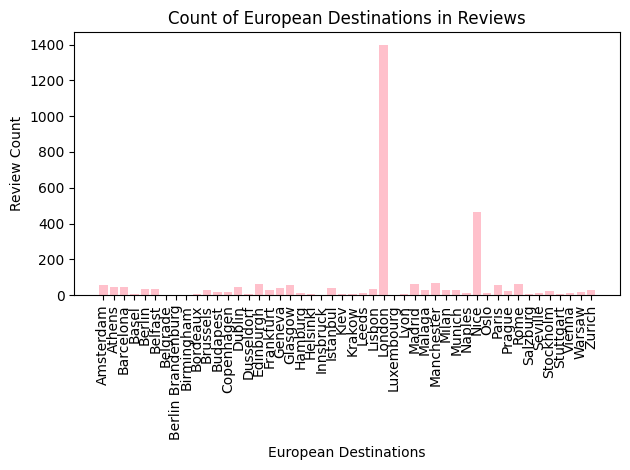

In [ ]:
#London looks massivley skewed in the data which may be from the fact many people are putting they are flying from London rather than going to London
#Code to filter this out

EuropeDictLdnFilt = {
    "Europe": [
        "Amsterdam", "Athens", "Barcelona", "Basel", "Berlin", "Belfast", "Belgrade",
        "Berlin Brandenburg", "Birmingham", "Bordeaux", "Brussels", "Budapest", "Copenhagen",
        "Dublin", "Dusseldorf", "Edinburgh", "Frankfurt", "Geneva", "Glasgow", "Hamburg",
        "Helsinki", "Innsbruck", "Istanbul", "Kiev", "Krakow", "Leeds", "Lisbon", "London",
        "Luxembourg", "Lyon", "Madrid", "Malaga", "Manchester", "Milan", "Munich", "Naples",
        "Nice", "Oslo", "Paris", "Prague", "Rome", "Salzburg", "Seville", "Stockholm",
        "Stuttgart", "Vienna", "Warsaw", "Zurich"
    ]
}


# Create a dictionary to store the counts for each individual destination
DestDf = {}

# Filtering out mentions of "London" when it's about departure, not destination
for destination in EuropeDictLdnFilt["Europe"]:
    if destination == "London":
        # Only count 'London' when it's mentioned as a destination, not a departure point
        count = df[df['reviews'].str.contains(r'\bLondon\b', case=False, na=False) &
                   ~df['reviews'].str.contains(r'\b(from|departing|flying from|via) London\b',
                                               case=False, na=False)].shape[0]
    else:
        count = df[df['reviews'].str.contains(fr'\b{destination}\b', case=False, na=False)].shape[0]

    DestDf[destination] = count

# Extracting the keys
categories = list(DestDf.keys())
counts = list(DestDf.values())

# Creating the bar chart
plt.bar(categories, counts, color='Pink')

# Adding title and labels
plt.title('Count of European Destinations in Reviews')
plt.xlabel('European Destinations')
plt.ylabel('Review Count')
plt.xticks(rotation=90, ha='center')  # Rotating x-axis labels for better readability

# Show the bar chart
plt.tight_layout()
plt.show()

#Reduction of over 100 reviews - London may still be popular!

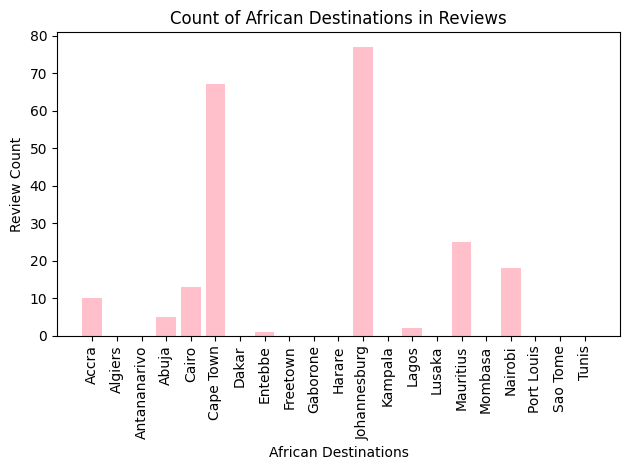

In [ ]:
# African destinations dictionary
AfricaDict = {
     "Africa": [
        "Accra", "Algiers", "Antananarivo", "Abuja", "Cairo", "Cape Town",
        "Dakar", "Entebbe", "Freetown", "Gaborone", "Harare", "Johannesburg",
        "Kampala", "Lagos", "Lusaka", "Mauritius", "Mombasa", "Nairobi",
        "Port Louis", "Sao Tome", "Tunis"
    ]
}

# Create a dictionary to store the counts for each individual destination
DestDfAfrica = {}

# Loop through each destination and count the occurrences in the reviews column
for destination in AfricaDict["Africa"]:
    count = df[df['reviews'].str.contains(destination, case=False, na=False)].shape[0]
    DestDfAfrica[destination] = count

# Extracting the keys
categories = list(DestDfAfrica.keys())
counts = list(DestDfAfrica.values())

# Creating the bar chart
plt.bar(categories, counts, color='Pink')

# Adding title and labels
plt.title('Count of African Destinations in Reviews')
plt.xlabel('African Destinations')
plt.ylabel('Review Count')
plt.xticks(rotation=90, ha='center')  # Rotating x-axis labels for better readability

# Show the bar chart
plt.tight_layout()
plt.show()

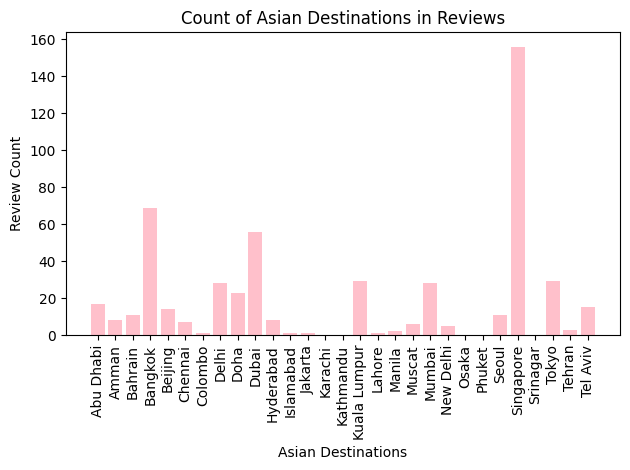

In [ ]:
# Asia destinations dictionary
AsiaDict = {
   "Asia": [
        "Abu Dhabi", "Amman", "Bahrain", "Bangkok", "Beijing", "Chennai",
        "Colombo", "Delhi", "Doha", "Dubai", "Hyderabad", "Islamabad",
        "Jakarta", "Karachi", "Kathmandu", "Kuala Lumpur", "Lahore", "Manila",
        "Muscat", "Mumbai", "New Delhi", "Osaka", "Phuket", "Seoul", "Singapore",
        "Srinagar", "Tokyo", "Tehran", "Tel Aviv", "Tokyo"
    ]
}

# Create a dictionary to store the counts for each individual destination
DestDfAsia = {}

# Loop through each destination and count the occurrences in the reviews column
for destination in AsiaDict["Asia"]:
    count = df[df['reviews'].str.contains(destination, case=False, na=False)].shape[0]
    DestDfAsia[destination] = count

# Extracting the keys
categories = list(DestDfAsia.keys())
counts = list(DestDfAsia.values())

# Creating the bar chart
plt.bar(categories, counts, color='Pink')

# Adding title and labels
plt.title('Count of Asian Destinations in Reviews')
plt.xlabel('Asian Destinations')
plt.ylabel('Review Count')
plt.xticks(rotation=90, ha='center')  # Rotating x-axis labels for better readability

# Show the bar chart
plt.tight_layout()
plt.show()

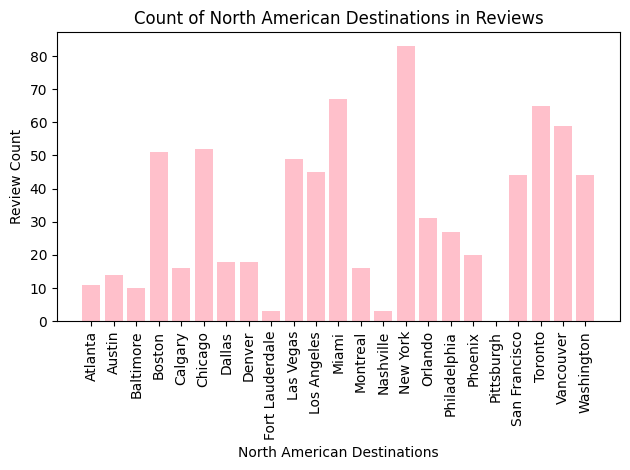

In [ ]:
# Asia destinations dictionary
NorthAmericaDict = {
"North America": [
        "Atlanta", "Austin", "Baltimore", "Boston", "Calgary", "Chicago", "Dallas",
        "Denver", "Fort Lauderdale", "Las Vegas", "Los Angeles", "Miami", "Montreal",
        "Nashville", "New York", "Orlando", "Philadelphia", "Phoenix", "Pittsburgh",
        "San Francisco", "Toronto", "Vancouver", "Washington"
    ]
}

# Create a dictionary to store the counts for each individual destination
DestDfNorthAmerica = {}

# Loop through each destination and count the occurrences in the reviews column
for destination in NorthAmericaDict["North America"]:
    count = df[df['reviews'].str.contains(destination, case=False, na=False)].shape[0]
    DestDfNorthAmerica[destination] = count

# Extracting the keys
categories = list(DestDfNorthAmerica.keys())
counts = list(DestDfNorthAmerica.values())

# Creating the bar chart
plt.bar(categories, counts, color='Pink')

# Adding title and labels
plt.title('Count of North American Destinations in Reviews')
plt.xlabel('North American Destinations')
plt.ylabel('Review Count')
plt.xticks(rotation=90, ha='center')  # Rotating x-axis labels for better readability

# Show the bar chart
plt.tight_layout()
plt.show()

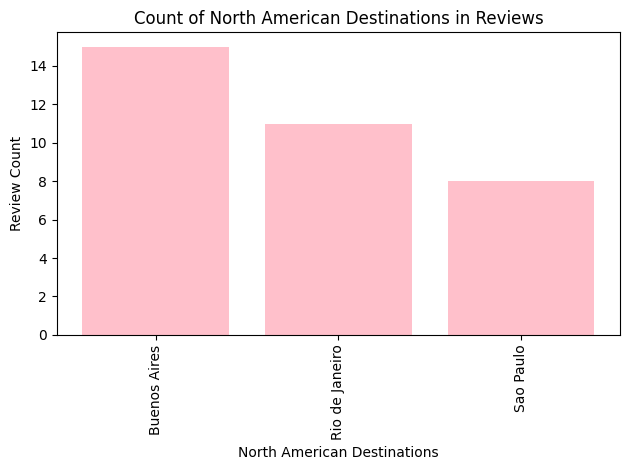

In [ ]:
# South America destinations dictionary
SouthAmericaDict = {
"South America": [
        "Buenos Aires", "Rio de Janeiro", "Sao Paulo"
    ]
}

# Create a dictionary to store the counts for each individual destination
DestDfSouthAmerica = {}

# Loop through each destination and count the occurrences in the reviews column
for destination in SouthAmericaDict["South America"]:
    count = df[df['reviews'].str.contains(destination, case=False, na=False)].shape[0]
    DestDfSouthAmerica[destination] = count

# Extracting the keys
categories = list(DestDfSouthAmerica.keys())
counts = list(DestDfSouthAmerica.values())

# Creating the bar chart
plt.bar(categories, counts, color='Pink')

# Adding title and labels
plt.title('Count of North American Destinations in Reviews')
plt.xlabel('North American Destinations')
plt.ylabel('Review Count')
plt.xticks(rotation=90, ha='center')  # Rotating x-axis labels for better readability

# Show the bar chart
plt.tight_layout()
plt.show()

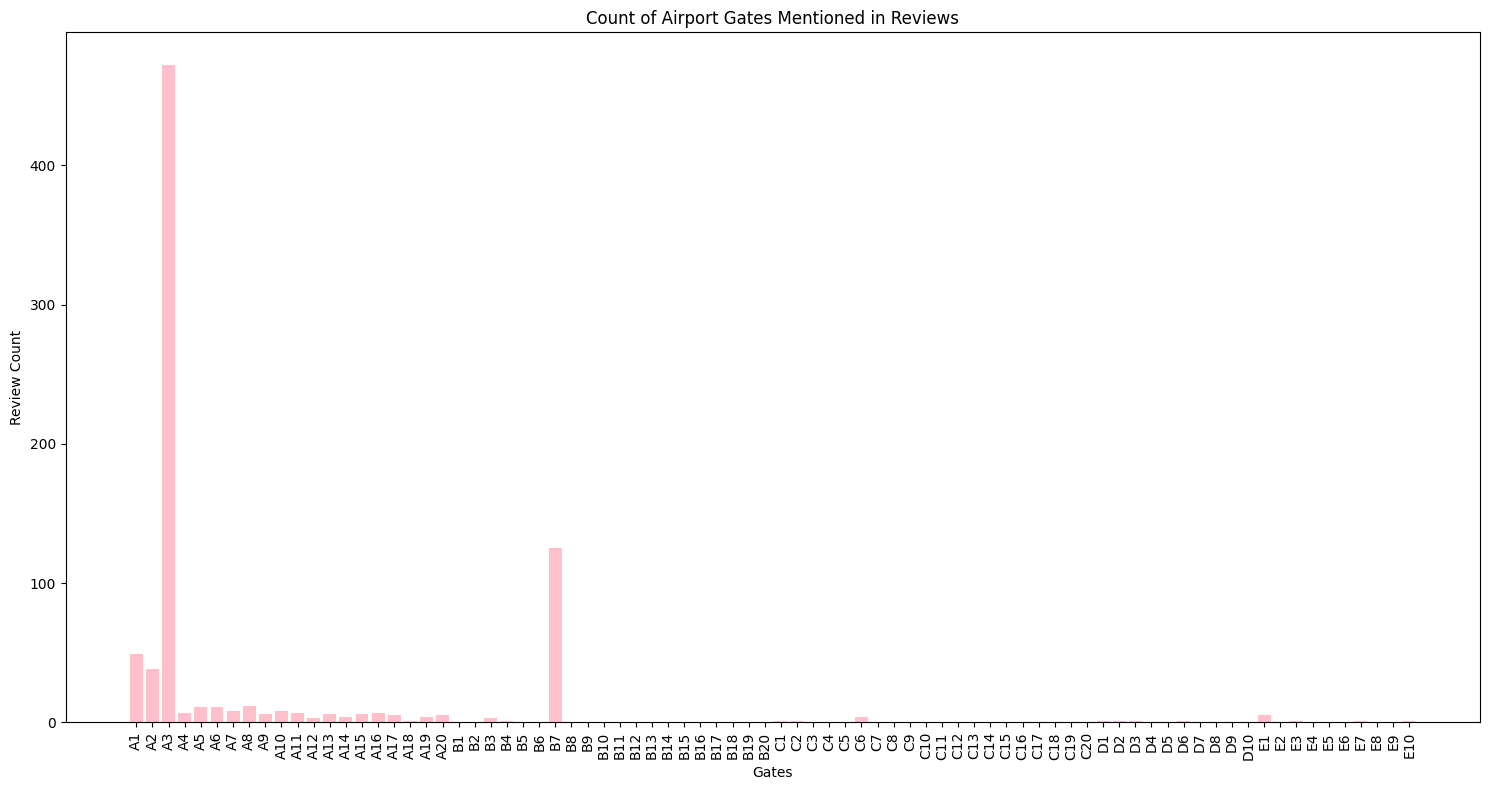

In [ ]:
#Identifying the most mentioned gates
AirportGatesDict = {
    "Airport Gates": [
        "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16",
        "A17", "A18", "A19", "A20", "B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9", "B10", "B11", "B12",
        "B13", "B14", "B15", "B16", "B17", "B18", "B19", "B20", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8",
        "C9", "C10", "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20", "D1", "D2", "D3", "D4",
        "D5", "D6", "D7", "D8", "D9", "D10", "E1", "E2", "E3", "E4", "E5", "E6", "E7", "E8", "E9", "E10"
    ]
}

# Create a dictionary to store the counts for each gate
DestDfGates = {}

# Loop through each gate and count the occurrences in the reviews column
for gate in AirportGatesDict["Airport Gates"]:
    count = df[df['reviews'].str.contains(gate, case=False, na=False)].shape[0]
    DestDfGates[gate] = count

# Extracting the keys
categories = list(DestDfGates.keys())
counts = list(DestDfGates.values())

# Creating the bar chart
plt.figure(figsize=(15, 8))
plt.bar(categories, counts, color='Pink')

# Adding title and labels
plt.title('Count of Airport Gates Mentioned in Reviews')
plt.xlabel('Gates')
plt.ylabel('Review Count')
plt.xticks(rotation=90, ha='center')  # Rotating x-axis labels for better readability

# Show the bar chart
plt.tight_layout()
plt.show()


# Key Data Insights:



*   66.5% of reviews are verified.
*   Most compliants are about delays.
*   Most positive reviews mention customer service.
*   European desitinatios are the most reviewed.
  *    This may create a bias as it is unevenly reviewed compared to other destionations.
*   London was heavily mentioned in the reviews which skewed the data, it was concluded this was because many people mentioned they are flying from London.
  *   Filtering this out allwed for a reduction of reviews for London.
*   A3 was the most mentioned airport gate.







